<a href="https://www.kaggle.com/code/handesav/flo-unsupervised-learning-customer-segmentation?scriptVersionId=189576501" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# DATASET STORY
FLO müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor. Buna yönelik olarak müşterilerin davranışları tanımlanacak ve bu davranışlardaki öbeklenmelere göre gruplar oluşturulacak.
    Veri seti Flo’dan son alışverişlerini 2020 - 2021 yıllarında Omni Channel (hem online hem offline alışveriş yapan) olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır.



# Features

* **master_id:**                           Eşsiz müşteri numarası
* **order_channel:**                       Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile)
* **last_order_channel:**                  En son alışverişin yapıldığı kanal
* **first_order_date:**                    Müşterinin yaptığı ilk alışveriş tarihi
* **last_order_date:**                     Müşterinin yaptığı son alışveriş tarihi
* **last_order_date_online:**              Müşterinin online platformda yaptığı son alışveriş tarihi
* **last_order_date_offline:**             Müşterinin offline platformda yaptığı son alışveriş tarihi
* **order_num_total_ever_online:**         Müşterinin online platformda yaptığı toplam alışveriş sayısı
* **order_num_total_ever_offline:**        Müşterinin offline'da yaptığı toplam alışveriş sayısı
* **customer_value_total_ever_offline:**   Müşterinin offline alışverişlerinde ödediği toplam ücret
* **customer_value_total_ever_online:**    Müşterinin online alışverişlerinde ödediği toplam ücret
* **interested_in_categories_12:**         Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi

İmports

In [1]:
%%capture
!pip install pydotplus missingno astor skompiler yellowbrick joblib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder,RobustScaler
import scipy.stats as stats
import missingno as msno
import joblib 
import pydotplus
from skompiler import skompile
import datetime as dt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Görev 1:  Veriyi Hazırlama

Adım 1:  flo_data_20K.csv verisini okutunuz 

In [4]:
df_ = pd.read_csv("/kaggle/input/flo-20k/flo_data_20k.csv") 
df = df_.copy()

In [5]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.000,1.000,139.990,799.380,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.000,2.000,159.970,1853.580,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.000,2.000,189.970,395.350,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.000,1.000,39.990,81.980,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.000,1.000,49.990,159.990,[AKTIFSPOR]


In [6]:
df.shape

(19945, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [8]:
df.describe().T      # aykırı değere sahip veriler var

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.000,3.111,4.226,1.000,1.000,2.000,4.000,200.000
order_num_total_ever_offline,19945.000,1.914,2.063,1.000,1.000,1.000,2.000,109.000
customer_value_total_ever_offline,19945.000,253.923,301.533,10.000,99.990,179.980,319.970,18119.140
customer_value_total_ever_online,19945.000,497.322,832.602,12.990,149.980,286.460,578.440,45220.130


In [9]:
df.isnull().sum()    # eksik veri yok

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

In [10]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

Son verilen sipariş tarihinden 1 gün sonrasını analiz günü yapıyorum.

In [11]:
df["last_order_date"].max()
analysis_date = dt.datetime(2021, 6, 1)

Adım 2:  Müşterileri segmentlerken kullanacağınız değişkenleri seçiniz

Not: Tenure (Müşterinin yaşı), Recency (en son kaç gün önce alışveriş yaptığı) gibi yeni değişkenler oluşturabilirsiniz

In [12]:
df["recency"] = (analysis_date - df["last_order_date"]).dt.days
df["tenure"] = (df["last_order_date"] - df["first_order_date"]).dt.days

In [13]:
model_df = df[["order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,4.000,1.000,139.990,799.380,95,119
1,19.000,2.000,159.970,1853.580,105,1469
2,3.000,2.000,189.970,395.350,186,366
3,1.000,1.000,39.990,81.980,135,11
4,1.000,1.000,49.990,159.990,86,582


# Görev 2:  K-Means ile Müşteri Segmentasyonu

Adım 1: Değişkenleri standartlaştırınız

In [14]:
#SKEWNESS
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column],color = "g")
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

order_num_total_ever_online's: Skew: 10.487693811914617, : SkewtestResult(statistic=152.9996121784795, pvalue=0.0)
order_num_total_ever_offline's: Skew: 20.328068075845888, : SkewtestResult(statistic=184.13121810134328, pvalue=0.0)
customer_value_total_ever_offline's: Skew: 16.29952194789334, : SkewtestResult(statistic=173.73456097827923, pvalue=0.0)
customer_value_total_ever_online's: Skew: 20.08427979804232, : SkewtestResult(statistic=183.56317267711924, pvalue=0.0)
recency's: Skew: 0.6172488156761073, : SkewtestResult(statistic=32.86977170491703, pvalue=5.944419293752164e-237)
tenure's: Skew: 1.756242119042335, : SkewtestResult(statistic=71.08790370222574, pvalue=0.0)


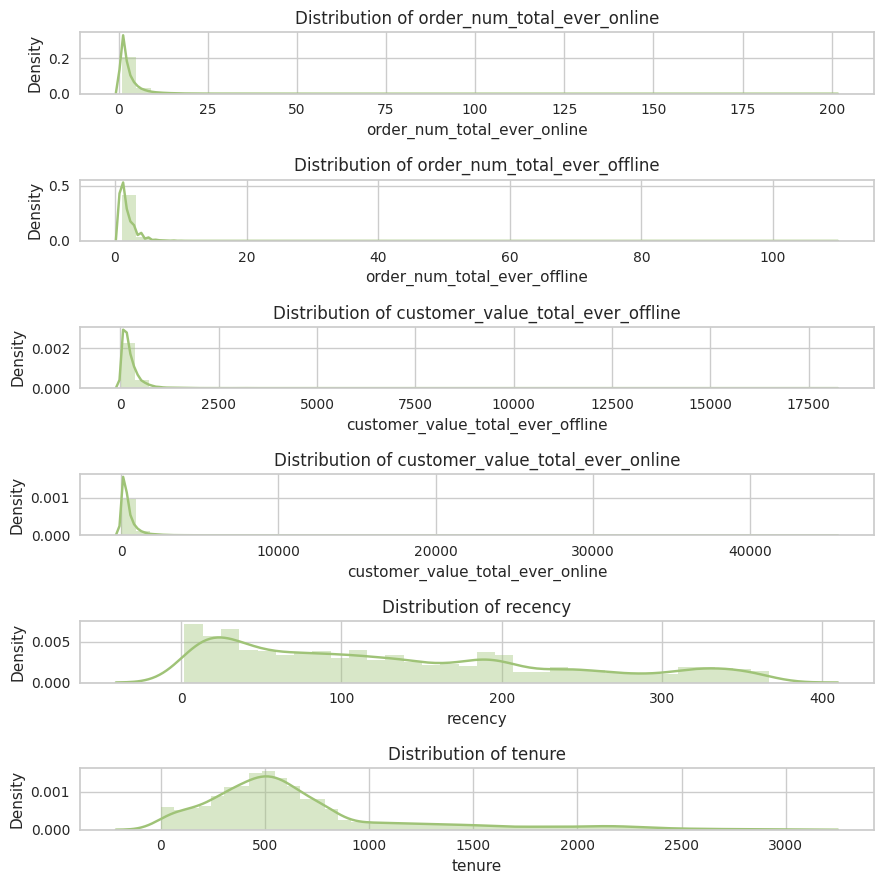

In [15]:
plt.figure(figsize=(9, 9))
plt.subplot(6, 1, 1)
check_skew(model_df,'order_num_total_ever_online')
plt.subplot(6, 1, 2)
check_skew(model_df,'order_num_total_ever_offline')
plt.subplot(6, 1, 3)
check_skew(model_df,'customer_value_total_ever_offline')
plt.subplot(6, 1, 4)
check_skew(model_df,'customer_value_total_ever_online')
plt.subplot(6, 1, 5)
check_skew(model_df,'recency')
plt.subplot(6, 1, 6)
check_skew(model_df,'tenure')
plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)
plt.show()

Bu kod, model_df veri çerçevesindeki 6 farklı sütunun dağılımlarını ve çarpıklıklarını görselleştirir ve analiz eder. Bu sütunlar şunlardır:

order_num_total_ever_online

order_num_total_ever_offline

customer_value_total_ever_offline

customer_value_total_ever_online

recency

tenure

Her bir sütunun histogramı ve çarpıklık değeri incelenerek, verinin normal dağılıma ne kadar yakın olduğu değerlendirilir. Bu tür analizler, özellikle veriyi dönüştürme (örneğin, log dönüşümü veya karekök dönüşümü) ihtiyacını belirlemek için önemlidir,çünkü birçok makine öğrenmesi algoritması normal dağılım varsayımı altında daha iyi performans gösterir.


çarpıklık durumlarına göre logaritma dönüşümlerini yapalım!

Büyük aralıkta değişen verilerin logaritmik dönüşümü, veriyi normalleştirmeye ve dağılımını daha simetrik hale getirmeye yardımcı olabilir. Bu, modelin daha iyi performans göstermesini sağlar.

Birçok istatistiksel analiz ve makine öğrenimi algoritması, verilerin normal dağılıma sahip olmasını varsayar. Logaritmik dönüşüm, pozitif çarpıklığı (right-skewed) olan verilerin daha simetrik ve normal dağılıma daha yakın hale gelmesini sağlar.

Aykırı Değerlerin Etkisinin Azaltılması

Logaritmik dönüşüm, büyük değerlerin etkisini azaltarak aykırı değerlerin model üzerindeki etkisini minimize eder. Bu, daha dengeli ve kararlı modeller elde etmeye yardımcı olur.

Doğrudan logaritma alındığında, 0 veya negatif değerler için sonuç tanımsızdır. Bu durumda, veriye 1 eklenerek logaritma alınır. 
Bu yöntem, 0 değerlerini içeren veya çok küçük pozitif değerlere sahip veri setleri için uygundur. 1 eklenmiş doğal logaritma dönüşümünün formülü:

y=ln(1+x)

In [16]:
model_df['order_num_total_ever_online']=np.log1p(model_df['order_num_total_ever_online'])
model_df['order_num_total_ever_offline']=np.log1p(model_df['order_num_total_ever_offline'])
model_df['customer_value_total_ever_offline']=np.log1p(model_df['customer_value_total_ever_offline'])
model_df['customer_value_total_ever_online']=np.log1p(model_df['customer_value_total_ever_online'])
model_df['recency']=np.log1p(model_df['recency'])
model_df['tenure']=np.log1p(model_df['tenure'])
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,1.609,0.693,4.949,6.685,4.564,4.787
1,2.996,1.099,5.081,7.525,4.663,7.293
2,1.386,1.099,5.252,5.982,5.231,5.905
3,0.693,0.693,3.713,4.419,4.913,2.485
4,0.693,0.693,3.932,5.081,4.466,6.368


In [17]:
# Scaling
scale = MinMaxScaler((0,1))
#scale = StandardScaler()
model_scaling = scale.fit_transform(model_df)  #numpy arrayi döner
model_df = pd.DataFrame(model_scaling, columns= model_df.columns)
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,0.199,0.000,0.344,0.501,0.721,0.597
1,0.499,0.101,0.362,0.605,0.741,0.910
2,0.150,0.101,0.385,0.414,0.859,0.737
3,0.000,0.000,0.178,0.220,0.793,0.310
4,0.000,0.000,0.207,0.302,0.700,0.794


Adım 2: Optimum küme sayısını belirleyiniz

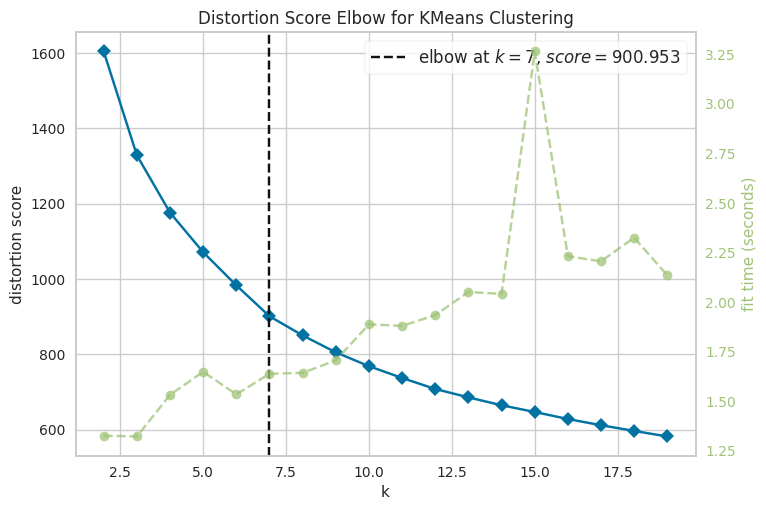

7

In [18]:
#Elbow yöntemini kullanalım

kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,20)).fit(model_df)
elbow.show()

elbow.elbow_value_

Adım 3:  Modelinizi oluşturunuz ve müşterilerinizi segmentleyiniz

In [19]:
k_means = KMeans(n_clusters = elbow.elbow_value_, random_state = 40).fit(model_df)

In [20]:
k_means.cluster_centers_
k_means.inertia_
k_means.labels_

cust_segments = k_means.labels_

In [21]:
final_df = df[["master_id","order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
final_df["segment"] = cust_segments

Adım 4: Herbir segmenti istatistiksel olarak inceleyeniz.

In [22]:
final_df.groupby("segment").agg({"order_num_total_ever_online":["mean","min","max"],
                                  "order_num_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_online":["mean","min","max"],
                                  "recency":["mean","min","max"],
                                  "tenure":["mean","min","max","count"]})

order_num_total_ever_online               order_num_total_ever_offline                \
                               mean   min     max                         mean   min     max   
segment                                                                                        
0                             1.429 1.000   5.000                        1.277 1.000   5.000   
1                             8.579 2.000 200.000                        2.094 1.000  36.000   
2                             2.168 1.000  11.000                        2.095 1.000  14.000   
3                             1.608 1.000   6.000                        1.479 1.000   6.000   
4                             1.823 1.000  13.000                        3.759 1.000 109.000   
5                             1.404 1.000   8.000                        1.130 1.000   6.000   
6                             6.441 1.000  55.000                        1.554 1.000  16.000   

        customer_value_total_ever_offline                   customer_value_total_ever_online  \
                                     mean     min       max                             mean   
segment                                                                                        
0                                 144.420  10.000   829.980                          211.650   
1                                 279.118  12.990  3589.650                         1468.613   
2                                 293.195  12.990  3425.140                          371.616   
3                                 185.853  12.990  1406.850                          249.579   
4                                 549.998 106.820 18119.140                          281.720   
5                                 192.606  12.990  1333.000                          250.505   
6                                 186.938  10.490  1644.790                          995.596   

                          recency           tenure                  
            min       max    mean min  max    mean min   max count  
segment                                                             
0        12.990  1519.170 226.036  88  367 490.118  52  2820  5456  
1       265.970 45220.130  32.081   2  109 966.503  18  3034  1971  
2        23.990  3444.080  10.034   2   27 662.657   2  2962  1833  
3        14.000  1307.330  50.543  15  109 604.323  51  2828  3342  
4        14.990  2587.200 153.765  22  366 728.282  20  2911  3279  
5        19.990  3476.810 139.346   4  367  37.028   0   132   826  
6       180.960 12038.180 178.717  55  367 947.570  26  2964  3238

# GÖREV 3: Hierarchical Clustering ile Müşteri Segmentasyonu

1. Görev 2'de standarlaştırdığınız dataframe'i kullanarak optimum küme sayısını belirleyiniz.

In [23]:
hc_average = linkage(model_df, 'average')

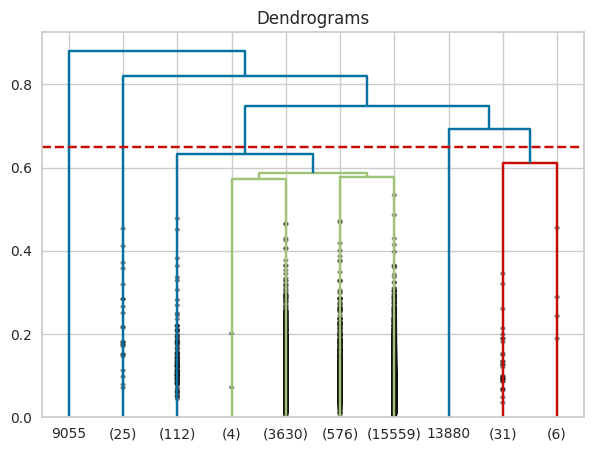

In [24]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.axhline(y=0.65, color='r', linestyle='--')    #çizgi atma işini yapan satır
plt.show()

2. Modelinizi oluşturunuz ve müşterileriniz segmentleyiniz.

In [25]:
hc = AgglomerativeClustering(n_clusters=5)
segments = hc.fit_predict(model_df)

In [26]:
final_df = df[["master_id","order_num_total_ever_online","order_num_total_ever_offline","customer_value_total_ever_offline","customer_value_total_ever_online","recency","tenure"]]
final_df["segment"] = segments
final_df["segment"] = final_df["segment"] + 1
final_df.head()

,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure,segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.000,1.000,139.990,799.380,95,119,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.000,2.000,159.970,1853.580,105,1469,3
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.000,2.000,189.970,395.350,186,366,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.000,1.000,39.990,81.980,135,11,4
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.000,1.000,49.990,159.990,86,582,1


3. Herbir segmenti istatistiksel olarak inceleyeniz.

In [27]:
final_df.groupby("segment").agg({"order_num_total_ever_online":["mean","min","max"],
                                  "order_num_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_offline":["mean","min","max"],
                                  "customer_value_total_ever_online":["mean","min","max"],
                                  "recency":["mean","min","max"],
                                  "tenure":["mean","min","max","count"]})

order_num_total_ever_online               order_num_total_ever_offline                \
                               mean   min     max                         mean   min     max   
segment                                                                                        
1                             1.371 1.000  13.000                        1.988 1.000 109.000   
2                             3.754 1.000  49.000                        1.817 1.000  24.000   
3                             6.906 1.000 200.000                        3.077 1.000  16.000   
4                             1.397 1.000   6.000                        1.199 1.000   6.000   
5                             4.741 1.000  24.000                        1.119 1.000   4.000   

        customer_value_total_ever_offline                  customer_value_total_ever_online  \
                                     mean    min       max                             mean   
segment                                                                                       
1                                 261.966 10.490 18119.140                          208.068   
2                                 240.984 12.990  3425.140                          638.614   
3                                 427.118 12.990  2963.240                         1104.125   
4                                 200.691 12.990  1019.970                          227.424   
5                                 123.463 10.000  1049.920                          722.768   

                          recency           tenure                   
            min       max    mean min  max    mean  min   max count  
segment                                                              
1        12.990 30688.470 183.027  18  367 569.723    3  2911  8747  
2        19.990 12545.370  23.962   2  108 715.066   18  3034  4994  
3       139.980 45220.130 131.574  14  365 914.487  109  3016  2396  
4        26.990  1389.600  92.516   4  367  80.258    0   555   985  
5        59.980  7665.280 196.524  36  367 876.954   71  2964  2823